In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Read in all the data from each subreddit and time interval

# MentalHealthRedditData
PreCovidMentalHealthRedditData = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PreCovidDepressionRedditData.csv')
PreCovidMentalHealthRedditData = PreCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})
DuringCovidMentalHealthRedditData = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/DuringCovidDepressionRedditData.csv')
DuringCovidMentalHealthRedditData = DuringCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})
PostCovidMentalHealthRedditData = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PostCovidDepressionRedditData.csv')
PostCovidMentalHealthRedditData = PostCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})



In [2]:
!pip install transformers


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [4]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [5]:
# Run for Roberta Model for MentalHealthRedditData Titles and Content
PreCovidMentalHealthRedditDataTitle = {}
PreCovidMentalHealthRedditDataContent = {}

DuringCovidMentalHealthRedditDataTitle = {}
DuringCovidMentalHealthRedditDataContent = {}

PostCovidMentalHealthRedditDataTitle = {}
PostCovidMentalHealthRedditDataContent = {}

AllMentalHealthRedditDataTitle = {}
AllMentalHealthRedditDataContent = {}

for i, row in tqdm(PreCovidMentalHealthRedditData.iterrows(), total=len(PreCovidMentalHealthRedditData)):
    try:
        preTitle = str(row['Title'])
        PreCovidMentalHealthRedditDataTitle[i] = polarity_scores_roberta(preTitle)
    except RuntimeError:
        print(f'Broke for Pre Title id {i}')
    try:
        preContent = str(row['Content'])
        PreCovidMentalHealthRedditDataContent[i] = polarity_scores_roberta(preContent)
    except RuntimeError:
        print(f'Broke for Pre Content id {i}')

for j, row in tqdm(DuringCovidMentalHealthRedditData.iterrows(), total=len(DuringCovidMentalHealthRedditData)):
    try:
        duringTitle = str(row['Title'])
        DuringCovidMentalHealthRedditDataTitle[j] = polarity_scores_roberta(duringTitle)
    except RuntimeError:
        print(f'Broke for During Title id {j}')
    try:
        duringContent = str(row['Content'])
        DuringCovidMentalHealthRedditDataContent[j] = polarity_scores_roberta(duringContent)
    except RuntimeError:
        print(f'Broke for During Content id {j}')

for k, row in tqdm(PostCovidMentalHealthRedditData.iterrows(), total=len(PostCovidMentalHealthRedditData)):
    try:
        postTitle = str(row['Title'])
        PostCovidMentalHealthRedditDataTitle[k] = polarity_scores_roberta(postTitle)
    except RuntimeError:
        print(f'Broke for Post Title id {k}')
    try:
        postContent = str(row['Content'])
        PostCovidMentalHealthRedditDataContent[k] = polarity_scores_roberta(postContent)
    except RuntimeError:
        print(f'Broke for Post Content id {k}')

  0%|          | 0/261 [00:00<?, ?it/s]

Broke for Pre Content id 54
Broke for Pre Content id 86
Broke for Pre Content id 104
Broke for Pre Content id 114
Broke for Pre Content id 138
Broke for Pre Content id 149
Broke for Pre Content id 241
Broke for Pre Content id 247
Broke for Pre Content id 252


  0%|          | 0/294 [00:00<?, ?it/s]

Broke for During Content id 15
Broke for During Content id 25
Broke for During Content id 28
Broke for During Content id 65
Broke for During Content id 77
Broke for During Content id 128
Broke for During Content id 135
Broke for During Content id 141
Broke for During Content id 179
Broke for During Content id 183
Broke for During Content id 197
Broke for During Content id 233
Broke for During Content id 241
Broke for During Content id 251
Broke for During Content id 277
Broke for During Content id 278


  0%|          | 0/191 [00:00<?, ?it/s]

Broke for Post Content id 51
Broke for Post Content id 67
Broke for Post Content id 76
Broke for Post Content id 78
Broke for Post Content id 90
Broke for Post Content id 109
Broke for Post Content id 111
Broke for Post Content id 134
Broke for Post Content id 151
Broke for Post Content id 160
Broke for Post Content id 170
Broke for Post Content id 171
Broke for Post Content id 175
Broke for Post Content id 178


In [6]:
preMentalHealthTitle = PreCovidMentalHealthRedditDataTitle
preMentalHealthContent = PreCovidMentalHealthRedditDataContent
preMentalHealthTitleDF = pd.DataFrame(preMentalHealthTitle).T
preMentalHealthContentDF = pd.DataFrame(preMentalHealthContent).T
preMentalHealthTitleDF = preMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
preMentalHealthContentDF = preMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
preMentalHealthTitleDF = preMentalHealthTitleDF.merge(PreCovidMentalHealthRedditData, on='ID', how='left')
preMentalHealthContentDF = preMentalHealthContentDF.merge(PreCovidMentalHealthRedditData, on='ID', how='left')

duringMentalHealthTitle = DuringCovidMentalHealthRedditDataTitle
duringMentalHealthContent = DuringCovidMentalHealthRedditDataContent
duringMentalHealthTitleDF = pd.DataFrame(duringMentalHealthTitle).T
duringMentalHealthContentDF = pd.DataFrame(duringMentalHealthContent).T
duringMentalHealthTitleDF = duringMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
duringMentalHealthContentDF = duringMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
duringMentalHealthTitleDF = duringMentalHealthTitleDF.merge(DuringCovidMentalHealthRedditData, on='ID', how='left')
duringMentalHealthContentDF = duringMentalHealthContentDF.merge(DuringCovidMentalHealthRedditData, on='ID', how='left')

postMentalHealthTitle = PostCovidMentalHealthRedditDataTitle
postMentalHealthContent = PostCovidMentalHealthRedditDataContent
postMentalHealthTitleDF = pd.DataFrame(postMentalHealthTitle).T
postMentalHealthContentDF = pd.DataFrame(postMentalHealthContent).T
postMentalHealthTitleDF = postMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
postMentalHealthContentDF = postMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
postMentalHealthTitleDF = postMentalHealthTitleDF.merge(PostCovidMentalHealthRedditData, on='ID', how='left')
postMentalHealthContentDF = postMentalHealthContentDF.merge(PostCovidMentalHealthRedditData, on='ID', how='left')

preMentalHealthTitleDF.head()

,ID,roberta_neg,roberta_neu,roberta_pos,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.896736,0.093963,0.009301,depression,Shout out to the particular hell that is funct...,"This is me. Don’t get me wrong, it’s better th...",I know how you feel. I feel sad and hopeless m...,6676,197,2019-07-14 07:53:40,cd0hjp
1,1,0.787849,0.186441,0.025710,depression,If 10 years ago someone told me that in 10 yea...,"But here I am, 24 years old man and doing exac...",[deleted],4420,125,2019-07-12 13:36:38,ccaxvm
2,2,0.896426,0.094109,0.009465,depression,High-functioning depression: I feel like I'm l...,I read a lot of posts on here of people strugg...,This would be called Persistent Depressive Dis...,4089,200,2019-10-31 09:36:19,dpl4bu
3,3,0.946791,0.048215,0.004994,depression,I cried in front of my family today. They ende...,"Thank you, that really helps. Now I feel ten t...",That honestly sucks! I hate when parents do th...,4022,177,2019-10-07 15:35:16,del3c8
4,4,0.306126,0.650462,0.043412,depression,Does anyone else stay up super late to avoid t...,I don’t know if that makes sense. What I mean ...,"Yes, every day! It's the only thing exciting i...",3923,179,2019-03-26 05:40:19,b5lw5z


date
1     0.670218
2     0.320638
3     0.494058
4     0.609569
5     0.670461
6     0.615283
7     0.601994
8     0.647486
9     0.706305
10    0.742671
11    0.681689
12    0.681471
dtype: float64
date
1     0.748926
2     0.645380
3     0.648873
4     0.714849
5     0.570003
6     0.647687
7     0.648527
8     0.670304
9     0.636945
10    0.712452
11    0.601298
12    0.642188
dtype: float64
date
1     0.700206
2     0.810163
3     0.605071
4     0.647821
5     0.789619
6     0.717824
7     0.768386
8     0.779999
9     0.776402
10    0.743636
11    0.574073
12    0.782084
dtype: float64


/var/folders/y5/24b2cc596dx6g22jggfvy_lm0000gn/T/ipykernel_47369/3392512103.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


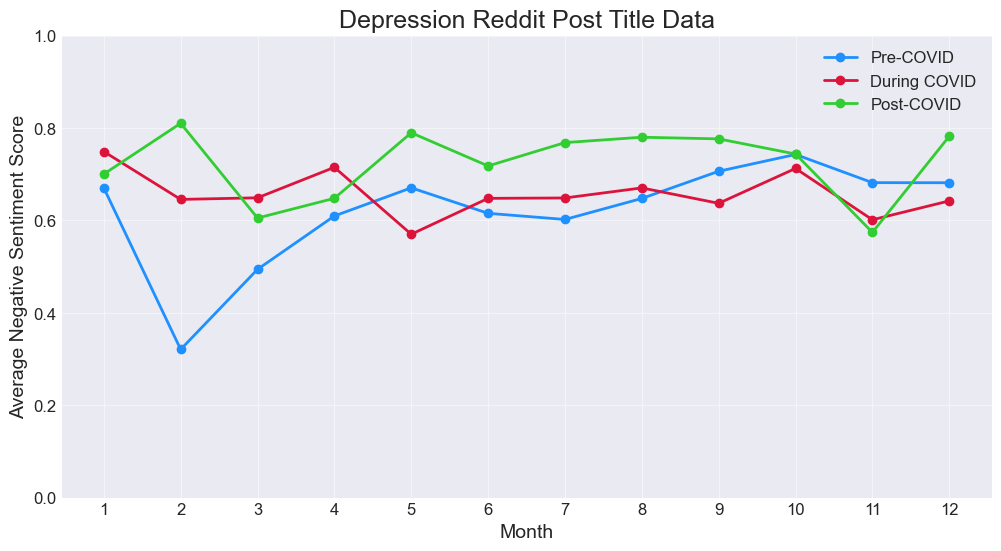

In [9]:
def postsPerMonth(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    return df.groupby('month').count()['uniquePostID']

def postsSumNegByMonth(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    return df.groupby(df['date'].dt.month)['roberta_neg'].sum()

preCovidPostPerMonthData = postsPerMonth(preMentalHealthTitleDF)
perCovidPostPerMonthNegSum = postsSumNegByMonth(preMentalHealthTitleDF)
preCovidNegPerMonthAverage = perCovidPostPerMonthNegSum / preCovidPostPerMonthData
print(preCovidNegPerMonthAverage)

duringCovidPostPerMonthData = postsPerMonth(duringMentalHealthTitleDF)
duringCovidPostPerMonthNegSum = postsSumNegByMonth(duringMentalHealthTitleDF)
duringCovidNegPerMonthAverage = duringCovidPostPerMonthNegSum / duringCovidPostPerMonthData
print(duringCovidNegPerMonthAverage)

postCovidPostPerMonthData = postsPerMonth(postMentalHealthTitleDF)
postCovidPostPerMonthNegSum = postsSumNegByMonth(postMentalHealthTitleDF)
postCovidNegPerMonthAverage = postCovidPostPerMonthNegSum / postCovidPostPerMonthData
print(postCovidNegPerMonthAverage)

plt.style.use('seaborn-darkgrid')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(preCovidNegPerMonthAverage, label='Pre-COVID', color='dodgerblue', linewidth=2, marker='o')
plt.plot(duringCovidNegPerMonthAverage, label='During COVID', color='crimson', linewidth=2, marker='o')
plt.plot(postCovidNegPerMonthAverage, label='Post-COVID', color='limegreen', linewidth=2, marker='o')

# Customize the plot
plt.title('Depression Reddit Post Title Data', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Negative Sentiment Score', fontsize=14)
plt.xticks(range(1, 13), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.show()

date
1     0.646602
2     0.360102
3     0.493905
4     0.655475
5     0.587304
6     0.582361
7     0.627129
8     0.614321
9     0.636122
10    0.693576
11    0.701562
12    0.648634
dtype: float64
date
1     0.635844
2     0.644138
3     0.559033
4     0.711832
5     0.583583
6     0.565650
7     0.606223
8     0.612226
9     0.698253
10    0.745744
11    0.670320
12    0.794870
dtype: float64
date
1     0.730260
2     0.712822
3     0.671768
4     0.690447
5     0.724392
6     0.686042
7     0.801181
8     0.839950
9     0.866998
10    0.660951
11    0.840595
12    0.809486
dtype: float64


/var/folders/y5/24b2cc596dx6g22jggfvy_lm0000gn/T/ipykernel_47369/1204692172.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


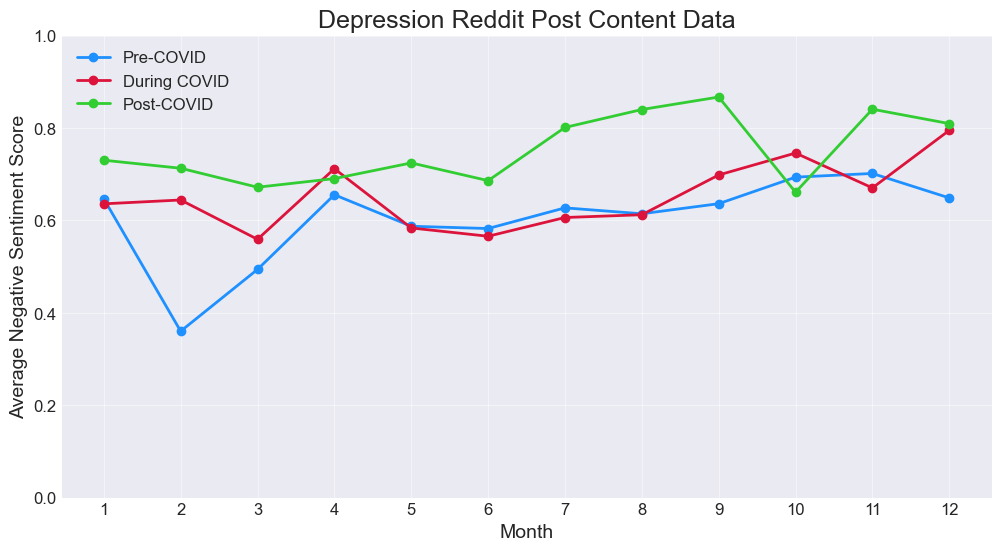

In [10]:
def postsPerMonth(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    return df.groupby('month').count()['uniquePostID']

def postsSumNegByMonth(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    return df.groupby(df['date'].dt.month)['roberta_neg'].sum()

preCovidPostPerMonthData = postsPerMonth(preMentalHealthContentDF)
perCovidPostPerMonthNegSum = postsSumNegByMonth(preMentalHealthContentDF)
preCovidNegPerMonthAverage = perCovidPostPerMonthNegSum / preCovidPostPerMonthData
print(preCovidNegPerMonthAverage)

duringCovidPostPerMonthData = postsPerMonth(duringMentalHealthContentDF)
duringCovidPostPerMonthNegSum = postsSumNegByMonth(duringMentalHealthContentDF)
duringCovidNegPerMonthAverage = duringCovidPostPerMonthNegSum / duringCovidPostPerMonthData
print(duringCovidNegPerMonthAverage)

postCovidPostPerMonthData = postsPerMonth(postMentalHealthContentDF)
postCovidPostPerMonthNegSum = postsSumNegByMonth(postMentalHealthContentDF)
postCovidNegPerMonthAverage = postCovidPostPerMonthNegSum / postCovidPostPerMonthData
print(postCovidNegPerMonthAverage)

plt.style.use('seaborn-darkgrid')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(preCovidNegPerMonthAverage, label='Pre-COVID', color='dodgerblue', linewidth=2, marker='o')
plt.plot(duringCovidNegPerMonthAverage, label='During COVID', color='crimson', linewidth=2, marker='o')
plt.plot(postCovidNegPerMonthAverage, label='Post-COVID', color='limegreen', linewidth=2, marker='o')

# Customize the plot
plt.title('Depression Reddit Post Content Data', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Negative Sentiment Score', fontsize=14)
plt.xticks(range(1, 13), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.show()